# Projeto baco

![Alt text](https://image.shutterstock.com/image-photo/wine-glasses-bottles-barrels-rustic-260nw-685599898.jpg)

# Grupo 4

 - Alícia Melo
 - Gabriel Araújo
 - Renata Cavalcante
 - Rômulo Santos

# Dataset 

    Disponibilizado por WineEnthusiast, revista estadunidense especialista em vinhos

In [1]:
# import librarys 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import time

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# disable warning due to some incompatible methods
import warnings
warnings.filterwarnings('ignore')

In [8]:
# import dataset 
wine = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")

wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Descrição Colunas

- Country The country that the wine is from
- Description
- Designation The vineyard within the winery where the grapes that made the wine are from
- Points The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they
only post reviews for wines that score equal 80)
- Price The cost for a bottle of the wine
- Province The province or state that the wine is from
- Region_1 The wine growing area in a province or state (ie Napa)
- Region_2 Sometimes there are more specific regions specified within a wine growing area (ie
Rutherford inside the Napa Valley), but this value can sometimes be blank
- Taster_name
- Taster_twitter_handle
- Title The title of the wine review, which often contains the vintage if you are interested
in extracting that feature
- Variety The type of grapes used to make the wine (ie Pinot Noir)
- Winery The winery that made the wine

In [9]:
# Visualize DataFrame types 
wine.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

### Classificação dos vinhos de acordo com a revista Wine Enthusiast

- 98–100 Classic The pinnacle of quality.

- 94–97 Superb A great achievement.

- 90–93 Excellent Highly recommended.

- 87–89 Very Good Often good value; well recommended.

- 83–86 Good Suitable for everyday consumption; often good value.

- 80–82 Acceptable Can be employed in casual, less-critical circumstances.

### Inicialmente olhamos a distribuição das linhas númericas encontradas no dataset:

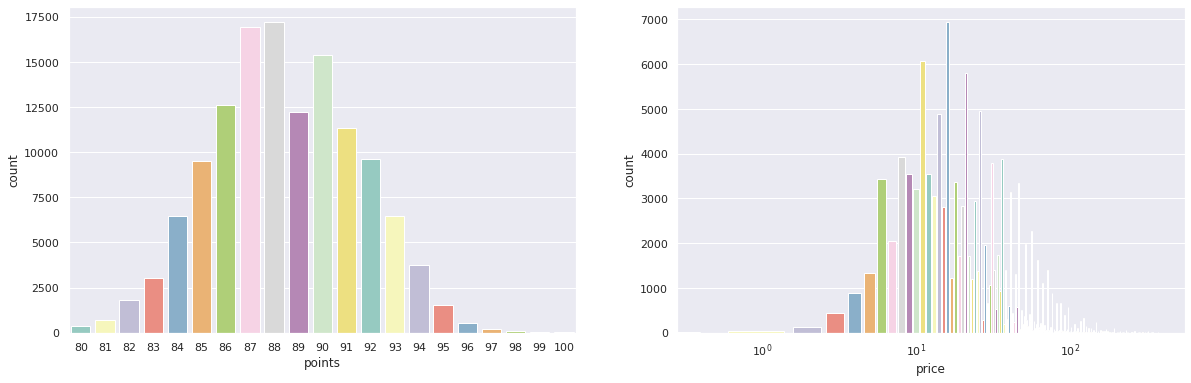

In [37]:
# Visualize the distribution of columns price and points in DataFrame

fig, ax = plt.subplots(1, 2,figsize=(20, 6))

sns.countplot(wine['points'], ax=ax[0], palette = 'Set3')
sns.countplot(wine['price'], ax=ax[1], palette = 'Set3')

ax[1].set(xscale="log")

sns.set_context("notebook")

plt.show()

In [11]:
def summary(df):
    s_df = pd.DataFrame(df.dtypes, columns=['Dtype'])
    
    s_df['Nunique'] = df.nunique()
    
    s_df['MissingValue'] = df.isnull().sum()
    
    s_df['Count'] = df.count()
    
    s_df['ZeroValues'] = (df == 0).sum()
    
    print(s_df)
    
summary(wine)

                         Dtype  Nunique  MissingValue   Count  ZeroValues
Unnamed: 0               int64   129971             0  129971           1
country                 object       43            63  129908           0
description             object   119955             0  129971           0
designation             object    37979         37465   92506           0
points                   int64       21             0  129971           0
price                  float64      390          8996  120975           0
province                object      425            63  129908           0
region_1                object     1229         21247  108724           0
region_2                object       17         79460   50511           0
taster_name             object       19         26244  103727           0
taster_twitter_handle   object       15         31213   98758           0
title                   object   118840             0  129971           0
variety                 object      70

In [12]:
wine.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


#### Temos algumas linhas repetidas, então vamos retirá-las do dataset.

In [13]:
print("Número total de linhas:",len(wine))

wine.drop_duplicates(inplace=True)

print("Número de linhas após retirar linhas duplicadas:",len(wine))

Número total de linhas: 129971
Número de linhas após retirar linhas duplicadas: 129971


#### Uma informação que pode ser interessante é da safra do vinho, a qual está presente na coluna 'title'.
#### Vamos extrair essa informação e adicionar em uma coluna própria.

In [14]:
wine['vintage'] = wine.title.str.extract(r'([0-9]+)', expand=True)
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


In [15]:
wine.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
vintage                   object
dtype: object

Podemos ver que a coluna recém adicionada é do tipo __object__. Vamos então convertê-la para __int__.

In [16]:
# substituir NaN na coluna vintage por zero
wine["vintage"] = wine["vintage"].replace(np.nan, 0, regex=True)

# converter o tipo da coluna vintage para int
wine["vintage"] = wine["vintage"].astype(dtype=np.int64)

# checar tipos
wine.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
vintage                    int64
dtype: object

# Perguntas

1. Vinhos caros necessariamente são melhor pontuados?

2. Quais são os países com as melhores e piores notas (top 3)?

3. Quais países produz os vinhos mais caros?

4. Quais são as variedades mais utilizadas?

5. A variedade de uva tem relação com a nota obtida?

6. O número de palavras da descição está relacionada com a nota?

7. Existem termos específicos relacionados a nota obtida?

8. Temperatura média do país tem influência na avaliação?

## Preço vs nota

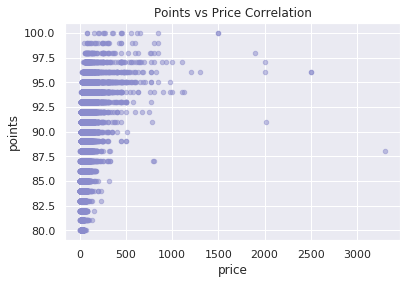

In [17]:
# Plot correlation variables points and price 

figure1 = wine.plot.scatter(x='price', y='points',c='#8B8CCC', 
                                   alpha=0.5,title='Points vs Price Correlation')

plt.show()

In [18]:
corrs = wine.corr()
corrs.round(2)

,Unnamed: 0,points,price,vintage
Unnamed: 0,1.00,0.01,0.00,0.01
points,0.01,1.00,0.42,0.07
price,0.00,0.42,1.00,0.02
vintage,0.01,0.07,0.02,1.00


O intervalo na variável preço vai de 4 a 3.300 dolares, enquanto que o intervalo de pontos vai de 80 a 100. Por isso vamos fazer uma normalização dessas duas variáveis pelo método do Zscore.  

In [19]:
# Create a column log_price from price column to facilite the visualization 
 
wine['log_price'] = np.log(wine['price'])

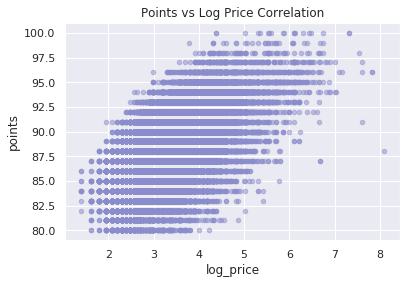

In [20]:
# Plot correlation variables points and log of price 

corr_graf2 = wine.plot.scatter(x='log_price', y='points',c='#8B8CCC', 
                                      alpha=0.5, title='Points vs Log Price Correlation')
plt.show()

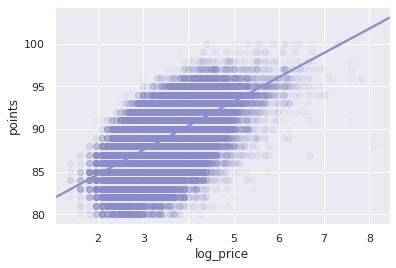

In [31]:
# Make a linear regression: 95% confidence interval (ci)

sns.regplot(x='log_price', y='points', data=wine, 
            scatter_kws={'alpha':0.05}, ci=95, color='#8B8CCC',)

plt.show()

## Países

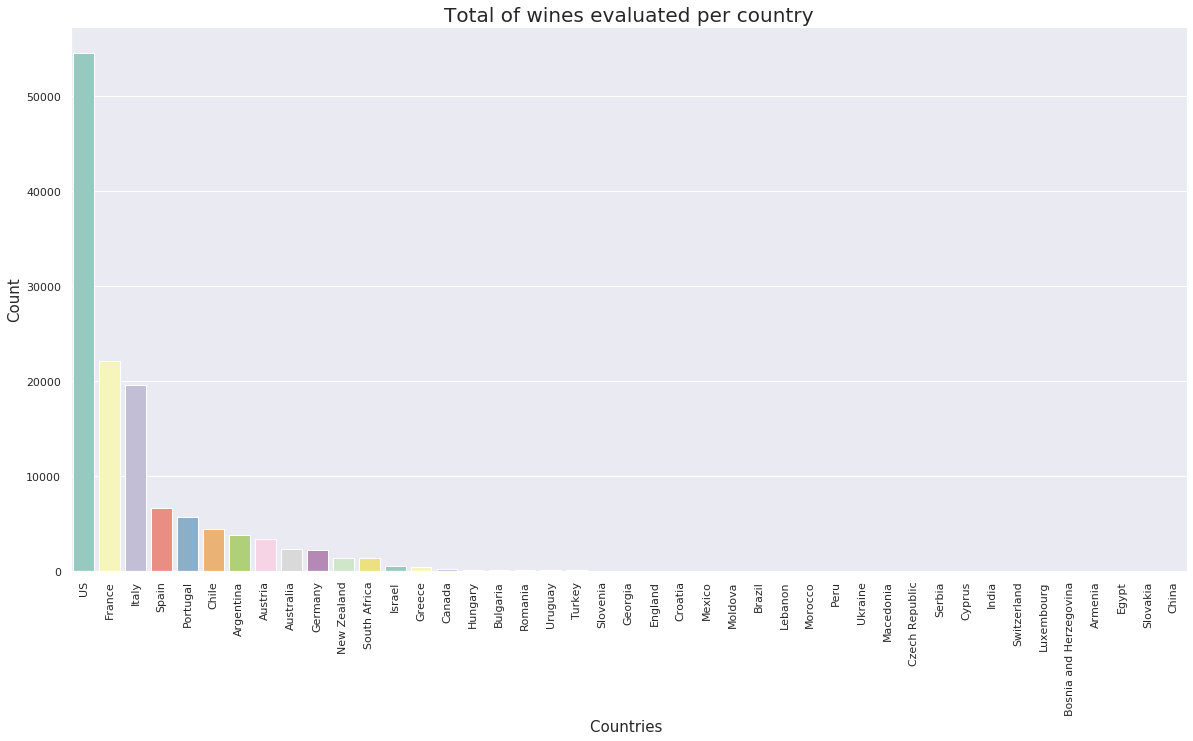

In [21]:
plt.figure(figsize=(20,10))

country = wine.country.value_counts()[:20]

g = sns.countplot(x='country', data=wine[wine.country.isin(country.index.values)],
                 order = wine['country'].value_counts().index, palette = 'Set3')
g.set_title("Total of wines evaluated per country", fontsize=20)
g.set_xlabel("Countries ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
sns.set_context("notebook")
plt.show()

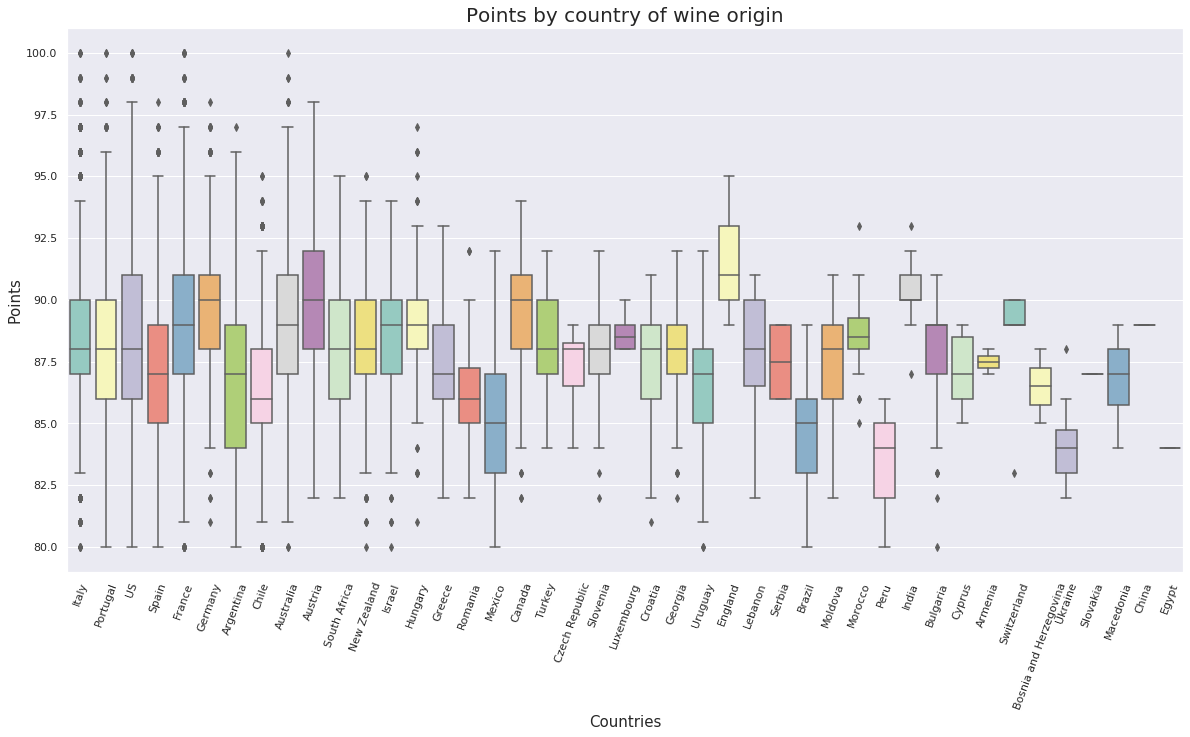

In [22]:
plt.figure(figsize=(20,10))

g1 = sns.boxplot(x='country', y='points',data=wine, palette = 'Set3')
g1.set_title("Points by country of wine origin", fontsize=20)
g1.set_xlabel("Countries", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=70)

plt.show()

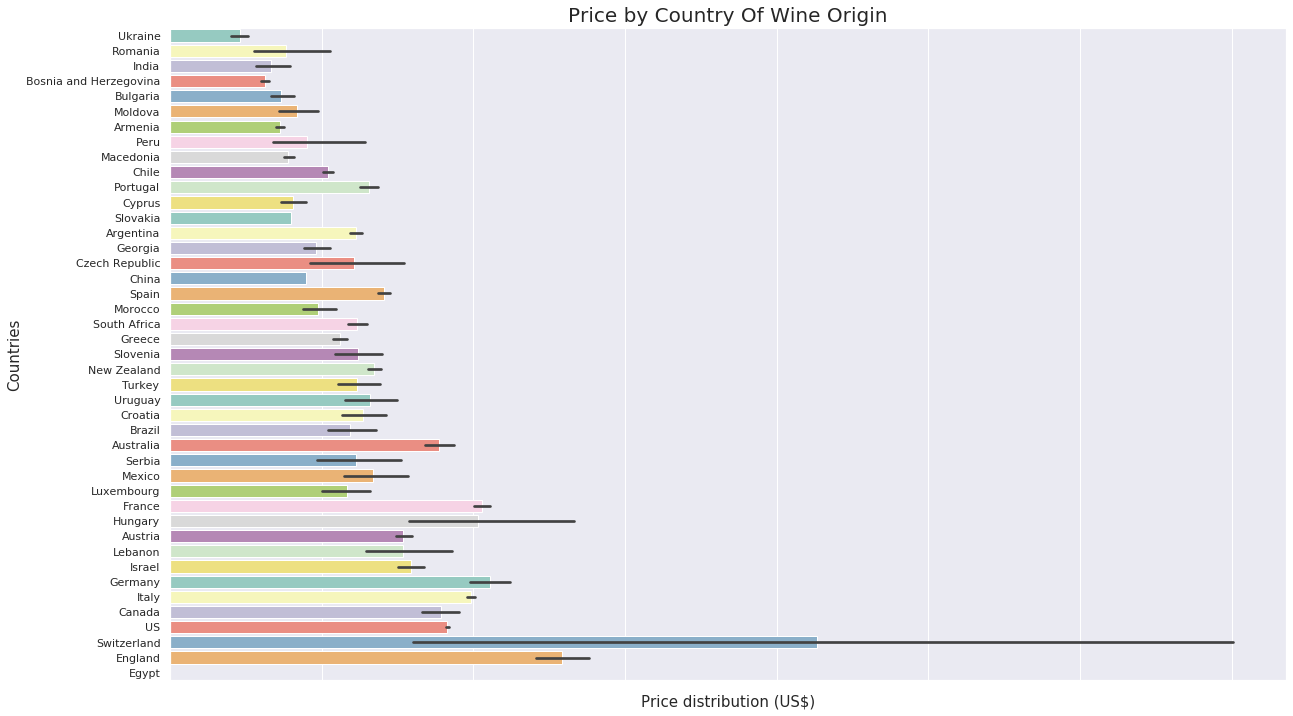

In [36]:
result = wine.groupby(["country"])['price'].aggregate(np.median).reset_index().sort_values('price')

plt.figure(figsize=(20,12))

g = sns.barplot(x='price', y='country', data=wine, order=result['country'], palette = 'Set3')
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Price distribution (US$)", fontsize=15)
g.set_ylabel("Countries", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=70)

plt.show()

## Variedades

In [24]:
print("Número de variedades:", wine['variety'].nunique())

Número de variedades: 707


Considerando que existem muitas variedades nos diferentes vinhos avaliados, vamos utilizar uma fração dessas variedades.

In [25]:
# pegar as 10 variedades mais frequentes e colocar numa lista
top10_freq = wine['variety'].value_counts().head(10)
top10_var = top10_freq.index.values.tolist()

# filtrar dataset para ter apenas as variedades selecionadas
wine_top_10 = wine[wine['variety'].isin(top10_var)]

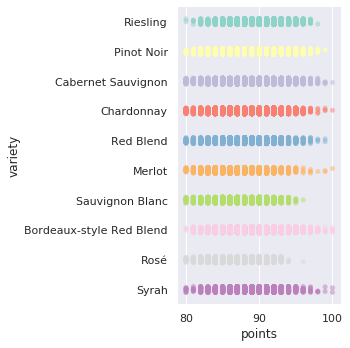

In [26]:
sns.catplot(x='points', y='variety', data=wine_top_10, alpha=0.5, palette = 'Set3')
plt.show()

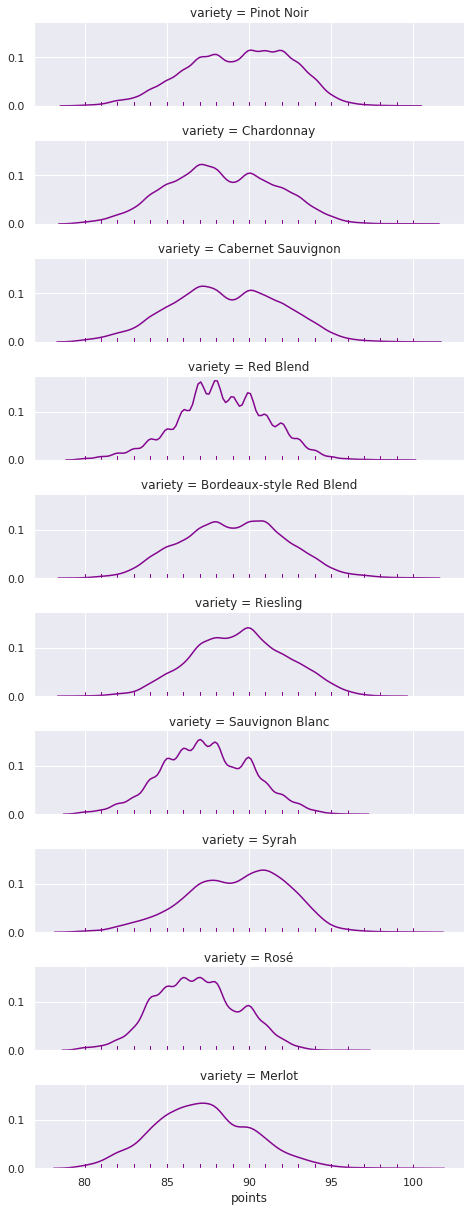

In [27]:
ordered_varieties = wine_top_10.variety.value_counts().index
g = sns.FacetGrid(wine_top_10, row='variety', row_order=ordered_varieties,
                 height=1.7,
                 aspect=4)

g.map(sns.distplot, 'points', hist=False, rug=True, color='#84068F')
plt.show()

<Figure size 1440x864 with 0 Axes>

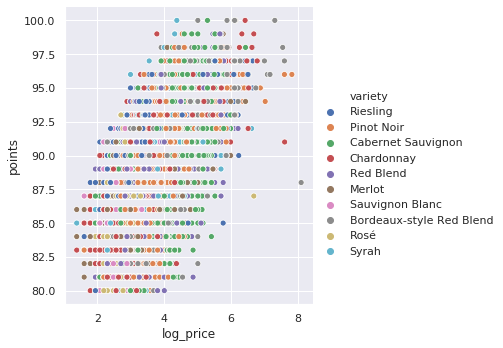

In [28]:
plt.figure(figsize=(20,12))

sns.relplot(x='log_price', 
            y='points', 
            data=wine_top_10,
            hue='variety')
plt.show()

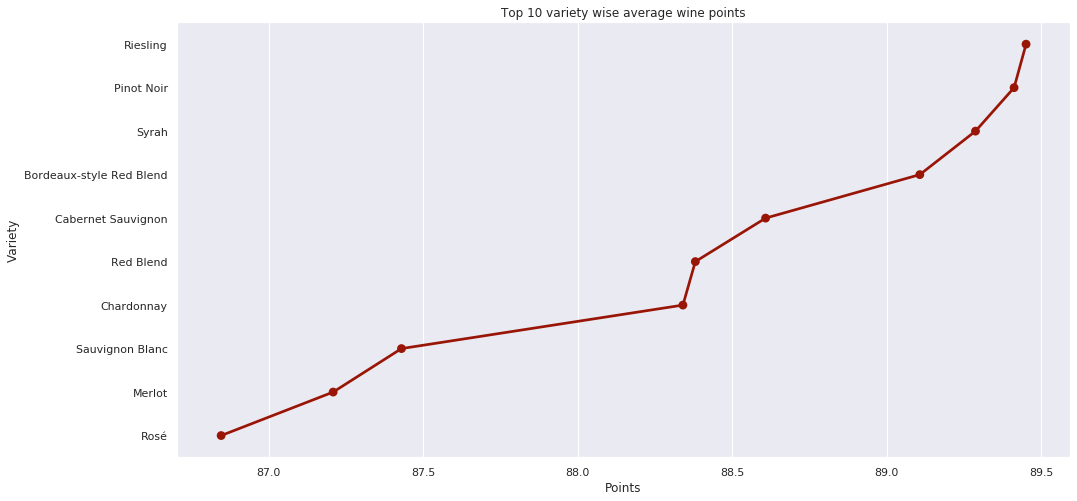

In [29]:
cnt = wine_top_10.groupby(['variety',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['points'] ,y = cnt.index ,color='#991506',orient='h',markers='o')
plt.title('Top 10 variety wise average wine points')
plt.xlabel('Points')
plt.ylabel('Variety');

## Número de palavras da descrição vs Nota

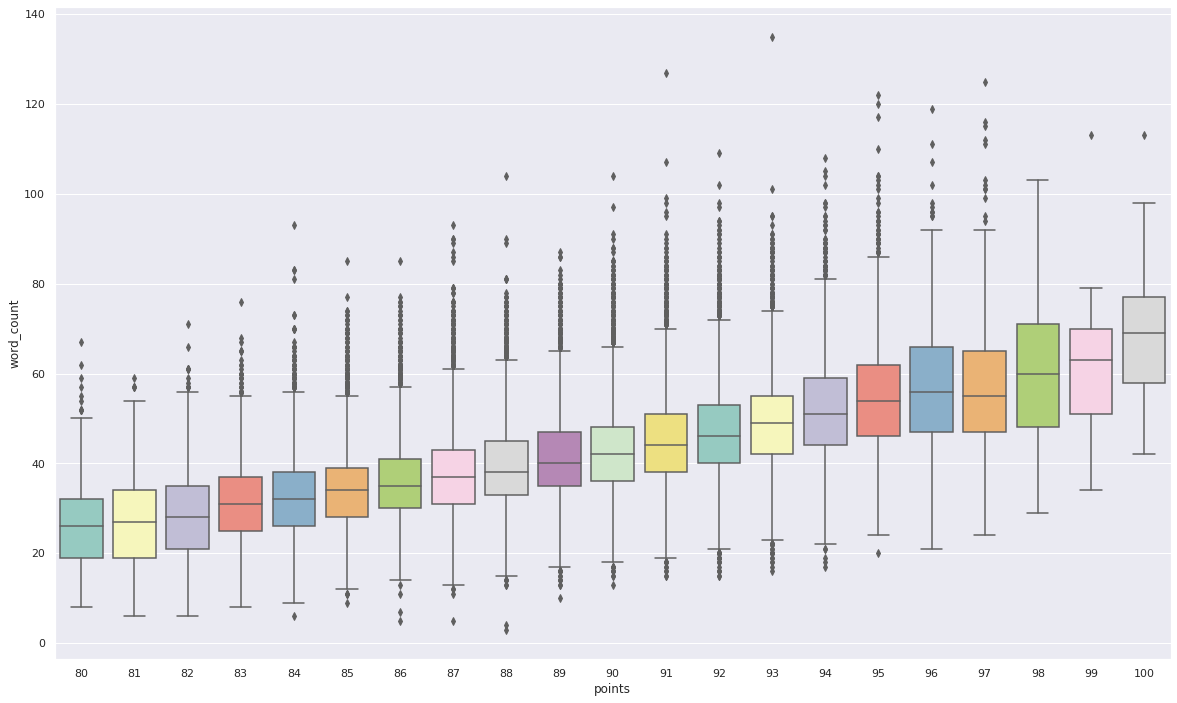

In [30]:
wine['word_count'] = wine['description'].apply(lambda x: len(str(x).split(" ")))

plt.figure(figsize=(20,12))

sns.boxplot(x = 'points', y = 'word_count', palette = 'Set3', data = wine, linewidth = 1.5)

plt.show()

### Baseando-se nos scores, agrupamos os vinhos em 3 categorias:

- Vinhos bons, mas não excelentes: engloba pontuações de 80 a 86;
- Vinhos bons-intermediários: engloba pontuações de 87 a 93;
- Os melhores vinhos: engloba pontuações de 94 a 100;

In [40]:
# Points from 80 to 86
score_80_86 = wine[wine['points'] <= 86].reset_index(drop=True)
score_80_86 = score_80_86.dropna().reset_index(drop=True)

# Points from 87 to 93
score_87_93 = wine[(wine['points'] >= 87) & (wine['points'] <= 93)].reset_index(drop=True)
score_87_93 = score_87_93.dropna().reset_index(drop=True)

# points from 94 to 100
score_94_100 = wine[wine['points'] >= 94].reset_index(drop=True)
score_94_100 = score_94_100.dropna().reset_index(drop=True)

In [41]:
# df_filtered descriptions by SCORES

score_80_86_txt = str(score_80_86.description)
score_87_93_txt = str(score_87_93.description)
score_94_100_txt = str(score_94_100.description)

stopwords = set(STOPWORDS)

# Remove words that are common among the descriptions, in order to see if there is one 
# characteristic that differentiates the quartiles

stopwords.update(["wine", "drink", "now", "flavor", "flavors", "aroma", "aromas",
                  "blend", "note", "notes", "made", "big", "find", "seems", "combine",
                 "yet", "color", "one", "touch", "put", "make", "show", "shows", "th"])

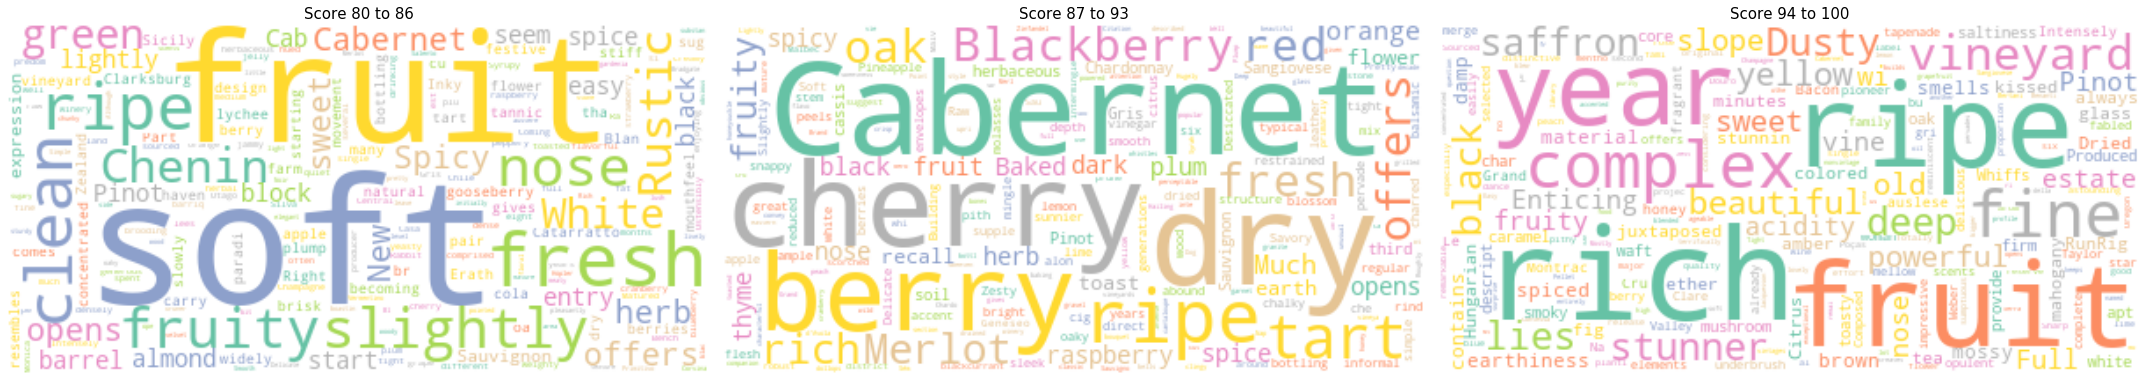

In [42]:
# Figures WordCloud by Score  

plt.figure(figsize=(30,15))

# Plot 1

plt.subplot(1, 3, 1)
plt.title('Score 80 to 86', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      colormap='Set2').generate(score_80_86_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 2

plt.subplot(1, 3, 2)
plt.title('Score 87 to 93', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      colormap='Set2').generate(score_87_93_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 3

plt.subplot(1, 3, 3)
plt.title('Score 94 to 100', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      colormap='Set2').generate(score_94_100_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()

### Word Cloud por Preço

In [38]:
# Separating the PRICE quartiles

price_quart1 = wine[wine.log_price < wine.log_price.quantile(.25)].reset_index(drop=True)
price_quart1 = price_quart1.dropna().reset_index(drop=True)

price_quart2 = wine[(wine.log_price < wine.log_price.quantile(.50)) & 
                    (wine.log_price >= wine.log_price.quantile(.25))].reset_index(drop=True)
price_quart2 = price_quart2.dropna().reset_index(drop=True)

price_quart3 = wine[(wine.log_price < wine.log_price.quantile(.75)) & 
                    (wine.log_price >= wine.log_price.quantile(.50))].reset_index(drop=True)
price_quart3 = price_quart3.dropna().reset_index(drop=True)

price_quart4 = wine[wine.log_price >= wine.log_price.quantile(.75)].reset_index(drop=True)
price_quart4 = price_quart4.dropna().reset_index(drop=True)

In [36]:
# df_filtered descriptions by PRICE

qt1_txt = str(price_quart1.description)
qt2_txt = str(price_quart2.description)
qt3_txt = str(price_quart3.description)
qt4_txt = str(price_quart4.description)

stopwords = set(STOPWORDS)

# Remove words that are common among the descriptions, in order to see if there is one 
# characteristic that differentiates the quartiles

stopwords.update(["wine", "drink", "now", "flavor", "flavors", "aroma", "aromas",
                  "blend", "note", "notes", "made", "big", "find", "seems", "combine",
                 "yet", "color", "one", "touch", "put", "make", "show", "shows", "th",])

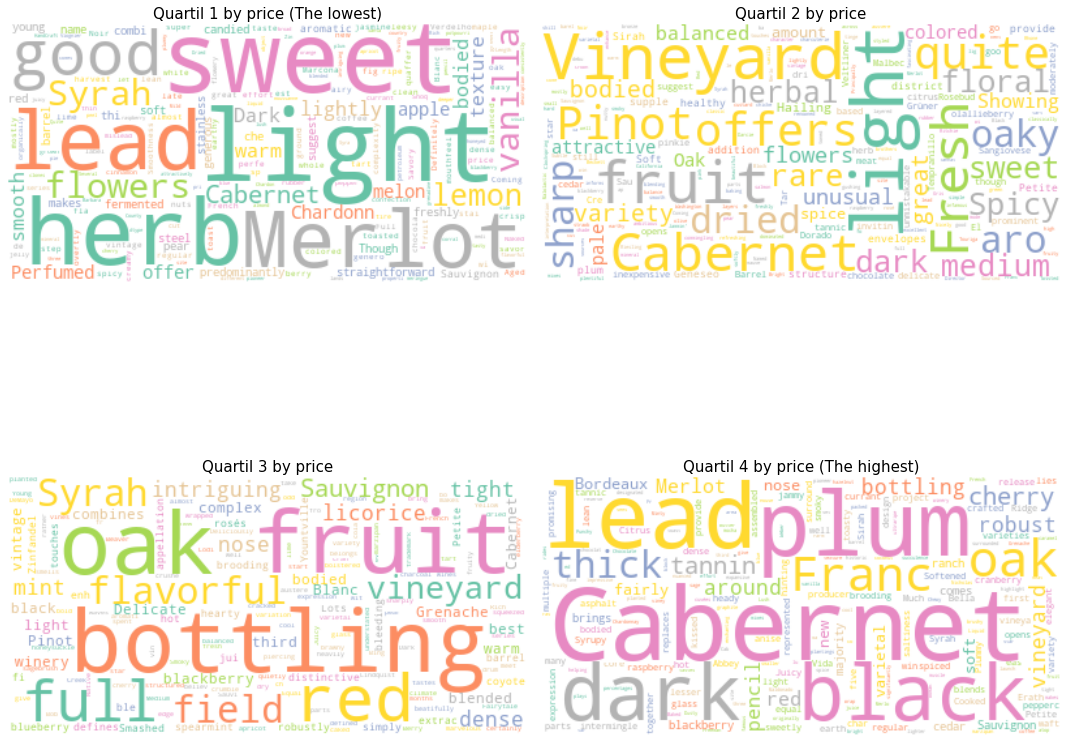

In [37]:
# Figures WordCloud by PRICE 

plt.figure(figsize=(15,15))

# Plot 1

plt.subplot(2, 2, 1)
plt.title('Quartil 1 by price (The lowest)', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      colormap='Set2').generate(qt1_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 2

plt.subplot(2, 2, 2)
plt.title('Quartil 2 by price', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      colormap='Set2').generate(qt2_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 3

plt.subplot(2, 2, 3)
plt.title('Quartil 3 by price', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      colormap='Set2').generate(qt3_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 4

plt.subplot(2, 2, 4)
plt.title('Quartil 4 by price (The highest)', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      colormap="Set2").generate(qt4_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()

### Word Cloud por Pontos

In [38]:
# Separating the POINT quartiles

point_quart1 = wine[wine.points < wine.points.quantile(.25)].reset_index(drop=True)
point_quart1 = point_quart1.dropna().reset_index(drop=True)

point_quart2 = wine[(wine.points < wine.points.quantile(.50)) & 
                    (wine.points >= wine.points.quantile(.25))].reset_index(drop=True)
point_quart2 = point_quart2.dropna().reset_index(drop=True)

point_quart3 = wine[(wine.points < wine.points.quantile(.75)) & 
                    (wine.points >= wine.points.quantile(.50))].reset_index(drop=True)
point_quart3 = point_quart3.dropna().reset_index(drop=True)

point_quart4 = wine[wine.points >= wine.points.quantile(.75)].reset_index(drop=True)
point_quart4 = point_quart4.dropna().reset_index(drop=True)

In [39]:
# df_filtered descriptions by POINTS

q1_txt = str(point_quart1.description)
q2_txt = str(point_quart2.description)
q3_txt = str(point_quart3.description)
q4_txt = str(point_quart4.description)

stopwords = set(STOPWORDS)

# Remove words that are common among the descriptions, in order to see if there is one
# characteristic that differentiates the quartiles

stopwords.update(["wine", "drink", "now", "flavor", "flavors", "aroma", "aromas",
                  "blend", "note", "notes", "made", "big", "find", "seems", "combine",
                 "yet", "color", "one", "touch", "put", "make", "show", "shows", "th"])

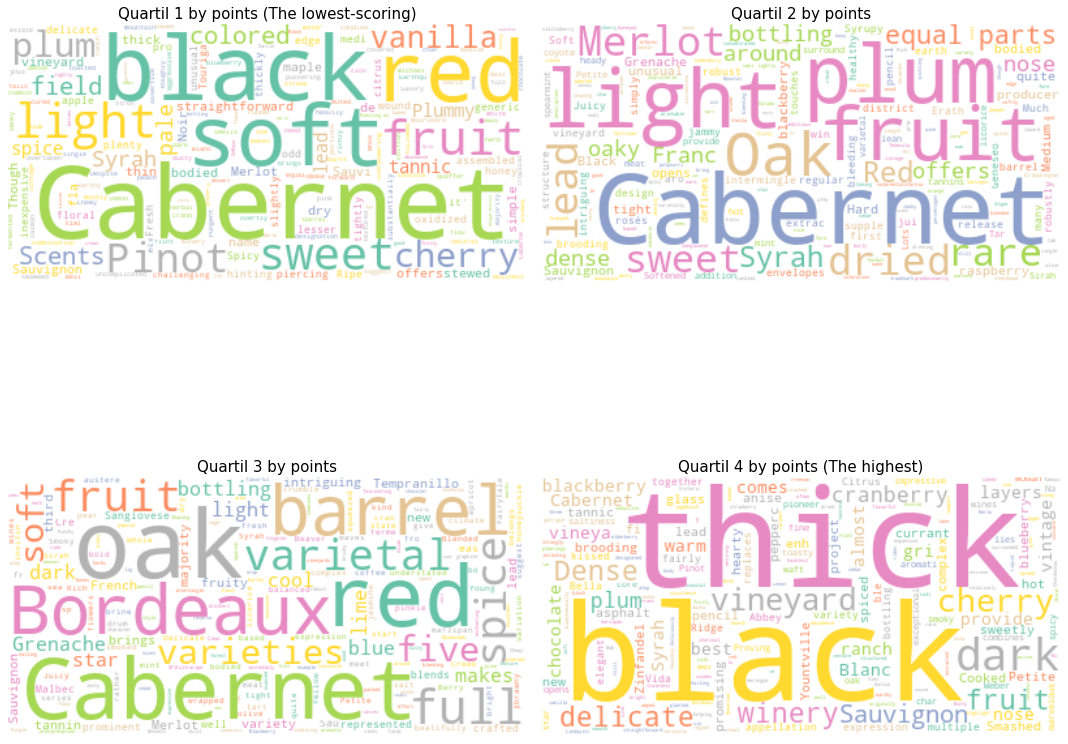

In [40]:
# Figures WordCloud by POINTS 

plt.figure(figsize=(15,15))

# Plot 1
plt.subplot(2, 2, 1)
plt.title('Quartil 1 by points (The lowest-scoring)', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white', colormap='Set2').generate(q1_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 2

plt.subplot(2, 2, 2)
plt.title('Quartil 2 by points', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white', colormap='Set2').generate(q2_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 3

plt.subplot(2, 2, 3)
plt.title('Quartil 3 by points', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white', colormap='Set2').generate(q3_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 4

plt.subplot(2, 2, 4)
plt.title('Quartil 4 by points (The highest)', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='white', colormap='Set2').generate(q4_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()

# Clima vs Nota

In [3]:
df_clima = pd.read_csv('GlobalLandTemperaturesByCountry_6.csv')

df_clima.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,2.482,2116.0,Austria
1,1743-12-01,NaN,NaN,Austria
2,1744-01-01,NaN,NaN,Austria
3,1744-02-01,NaN,NaN,Austria
4,1744-03-01,NaN,NaN,Austria


In [4]:
# cleaning Dataset

df_clima_clear = df_clima[~df_clima['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

df_clima_clear = df_clima_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)',
    'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

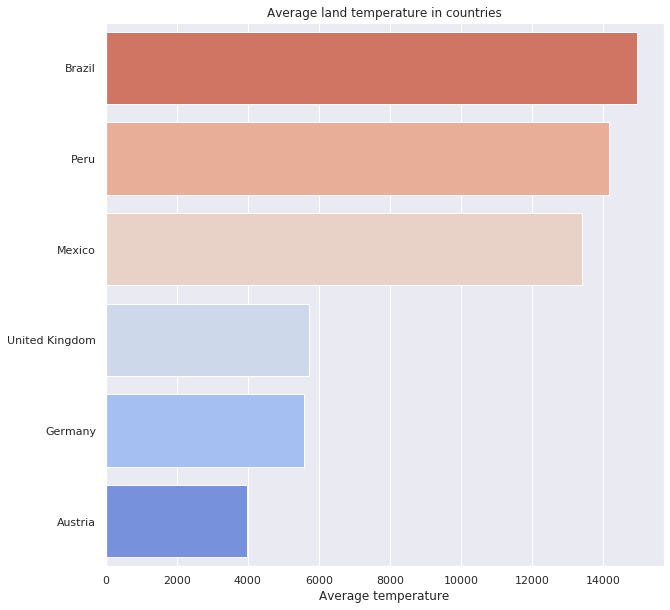

In [5]:
# Let's average temperature for each country

countries = np.unique(df_clima_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(df_clima_clear[df_clima_clear['Country'] == 
                                               country]['AverageTemperature'].mean())

mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=1) 
f, ax = plt.subplots(figsize=(10, 10))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

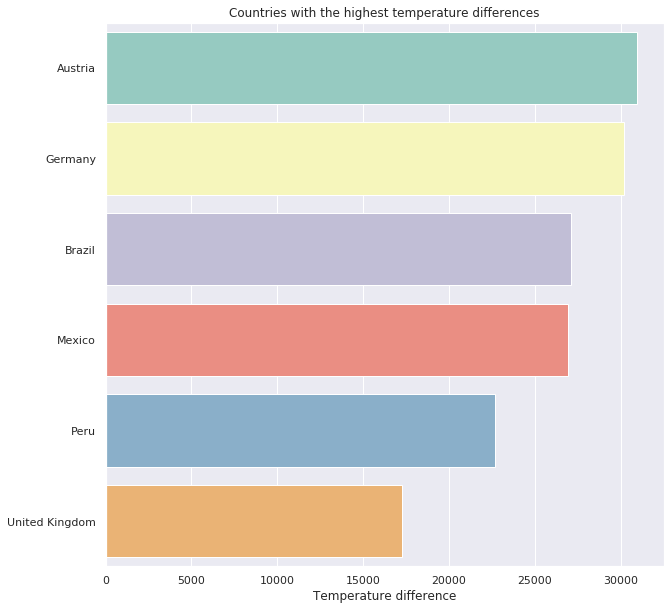

In [7]:
max_min_list = []

# getting max and min temps
for country in countries:
    curr_temps = df_clima[df_clima['Country'] == country]['AverageTemperature']
    max_min_list.append((curr_temps.max(), curr_temps.min()))
    
# cleaning data
res_max_min_list = []
res_countries = []

for i in range(len(max_min_list)):
    if not np.isnan(max_min_list[i][0]):
        res_max_min_list.append(max_min_list[i])
        res_countries.append(countries[i])

# calculating differences        
differences = []

for tpl in res_max_min_list:
    differences.append(tpl[0] - tpl[1])
    
# sorting
differences, res_countries = (list(x) for x in zip(*sorted(zip(differences, res_countries), 
                                                           key=lambda pair: pair[0], reverse=True)))

# ploting
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=differences[:], y=res_countries[:], palette= "Set3", ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature difference", 
               title="Countries with the highest temperature differences")

# Conclusões

- Preço e nota são correlacionados: vinhos mais caros tendem a ter notas melhores.


- A variedade da uva não parece influenciar na nota do vinho. No entanto, é possível ver que algumas variedades estão mais presentes em avaliações melhores e piores:
    - Merlot e Rosé têm notas piores
    - Cabernet está presente em vinhos de todas as categorias
    - Pinot Noir e Riesling têm notas melhores


- Pelos dados, os EUA seriam o maior produtor de vinho do mundo. No entanto, existe um viés no dataset, já que o número de resenhas para vinhos americanos é muito maior do que para os demais países.


- Os países que produzem vinhos com melhores avaliações são Inglaterra, Áustria e Alemanha.


- Os países que produzem vinhos com piores avaliações são México, Brasil e Peru.


- O país com os vinhos mais caros é a Suíça.


- Vinhos com menores notas são comumente descritos como vinhos mais adocicados, frutados e leves.


- Vinhos com notas intermediárias são descritos como seco, refrescante, frutado e rico.


- Vinhos com maiores notas são descritos como forte, rico, complexo e ácido.


- Países com temperaturas médias mais altas tendem a produzir vinhos com notas não tão altas.


- Países com temperaturas médias mais baixas tendem ter os seus vinhos avaliados com notas mais altas.